In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import xarray as xr

%matplotlib inline
plt.rcParams.update({'font.size': 12})


In [2]:
filename = '/Users/gabriel/Desktop/DATA-LASP/dlr_dmin.nc'

dataset = nc.Dataset(filename)

In [3]:
print(dataset)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Source_of_Data: United States Geological Survey (USGS)
    Station_Name: Del Rio
    IAGA_CODE: DLR
    Latitude: 29.3
    Longitude: -100.8
    Elevation: 357
    Sensor_Orientation: HDZF
    Digital_Sampling: 100.0 second
    Data_Interval_Type: filtered 1-minute (00:15-01:45)
    Data_Type: Definitive
    url: https://geomag.usgs.gov/monitoring/observatories/
    file_conversion_author: Greg Lucas (glucas@usgs.gov)
    dimensions(sizes): Time(13363740)
    variables(dimensions): int64 Time(Time), float64 X(Time), float64 Y(Time), float64 Z(Time)
    groups: 


In [4]:
# Del Rio, South, USA

In [5]:
print(dataset.__dict__)

{'Source_of_Data': 'United States Geological Survey (USGS)', 'Station_Name': 'Del Rio', 'IAGA_CODE': 'DLR', 'Latitude': 29.3, 'Longitude': -100.8, 'Elevation': 357, 'Sensor_Orientation': 'HDZF', 'Digital_Sampling': '100.0 second', 'Data_Interval_Type': 'filtered 1-minute (00:15-01:45)', 'Data_Type': 'Definitive', 'url': 'https://geomag.usgs.gov/monitoring/observatories/', 'file_conversion_author': 'Greg Lucas (glucas@usgs.gov)'}


In [6]:
for dim in dataset.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'Time', size = 13363740


In [7]:
for var in dataset.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
int64 Time(Time)
    units: minutes since 1982-08-04 15:00:00
    calendar: proleptic_gregorian
unlimited dimensions: Time
current shape = (13363740,)
filling on, default _FillValue of -9223372036854775806 used
<class 'netCDF4._netCDF4.Variable'>
float64 X(Time)
    _FillValue: nan
    description: X-component (Geographic North) of the magnetic field
    units: nT
unlimited dimensions: Time
current shape = (13363740,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 Y(Time)
    _FillValue: nan
    description: Y-component (Geographic East) of the magnetic field
    units: nT
unlimited dimensions: Time
current shape = (13363740,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 Z(Time)
    _FillValue: nan
    description: Z-component (Geographic Down [-r]) of the magnetic field
    units: nT
unlimited dimensions: Time
current shape = (13363740,)
filling on


In [8]:
ds = xr.open_dataset(filename)
df = ds.to_dataframe()
df.reset_index(inplace=True)

In [9]:
df.head(5)

,Time,X,Y,Z
0,1982-08-04 15:00:00,25899.085005,3992.420434,42229.0
1,1982-08-04 15:01:00,25899.085005,3992.420434,42228.0
2,1982-08-04 15:02:00,25899.201129,3991.667058,42228.0
3,1982-08-04 15:03:00,25899.201129,3991.667058,42228.0
4,1982-08-04 15:04:00,25899.201129,3991.667058,42228.0


In [10]:
df.tail(5)

,Time,X,Y,Z
13363735,2007-12-31 23:55:00,25045.1,3037.5,40479.5
13363736,2007-12-31 23:56:00,NaN,NaN,40479.5
13363737,2007-12-31 23:57:00,NaN,NaN,40479.4
13363738,2007-12-31 23:58:00,NaN,NaN,40479.2
13363739,2007-12-31 23:59:00,NaN,NaN,40479.2


In [11]:
# NaN in end data

Text(0, 0.5, 'X-component of magnetic field')

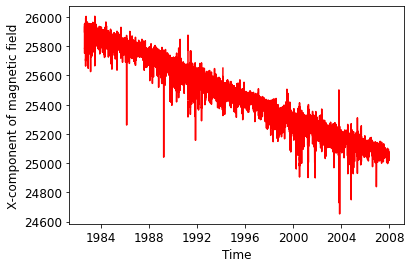

In [12]:
#plot of all data

plt.plot(df['Time'], df['X'], label='data', color='red')
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')

In [13]:
# Significant decline; 26000 to 24600

Text(0, 0.5, 'Y-component of magnetic field')

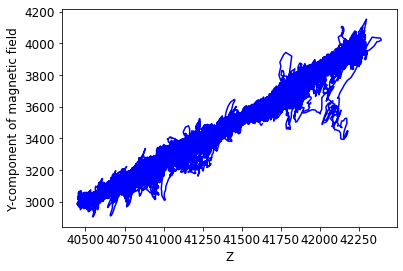

In [14]:
plt.plot(df['Z'], df['Y'], label='data', color='blue')
plt.xlabel('Z')
plt.ylabel('Y-component of magnetic field')

In [15]:
# In 3D, Z values seem to gain upward

In [16]:
df['Time_Diff'] = df['Time'].diff()
df['Time_Diff'].max()

Timedelta('0 days 00:01:00')

In [17]:
# Print the number of nans in each column
for col in df.columns.to_list():
    print(col, df[col].isna().sum())

# Less Z data? 

Time 0
X 1204370
Y 1204370
Z 995388
Time_Diff 1


In [18]:
df_1982 = df[df['Time'] < pd.Timestamp(1982, 12, 31)]
inds_1982 = list(pd.isnull(df_1982['X']).to_numpy().nonzero()[0]) # indices of NaN values for the X component
inds_len_1982 = len(inds_1982) # number of NaNs in the X component
print(inds_len_1982)

26230


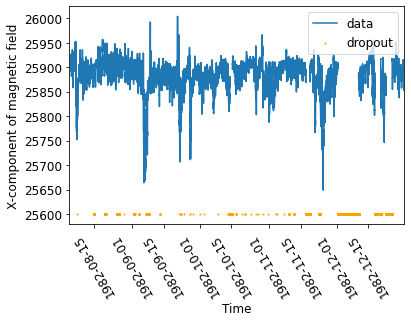

In [19]:
# Plot the 1982 data
plt.plot(df_1982['Time'], df_1982['X'], label='data')
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')

# This just puts a orange dot anywhere there is a data dropout. 
# The y-value 25600 is just so it displays at the bottom.
plt.scatter(df_1982['Time'][inds_1982], [25600]*inds_len_1982, color='orange', label='dropout', s=1)

# specific time 
plt.xlim([datetime.date(1982, 8, 4), datetime.date(1982, 12, 31)])
plt.xticks(rotation=120)
plt.legend()

In [20]:
df_1985 = df[df['Time'] < pd.Timestamp(1985, 12, 31)]
inds_1985 = list(pd.isnull(df_1985['X']).to_numpy().nonzero()[0]) # indices of NaN values for the X component
inds_len_1985 = len(inds_1985) # number of NaNs in the X component
print(inds_len_1985)

376535


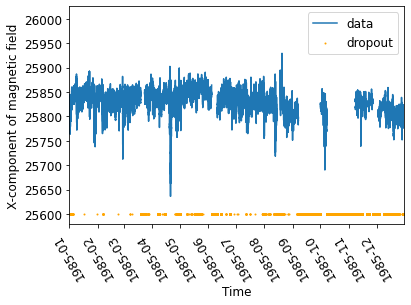

In [21]:
# Plot the 1985 data
plt.plot(df_1985['Time'], df_1985['X'], label='data')
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')

# This just puts a orange dot anywhere there is a data dropout. 
# The y-value 25600 is just so it displays at the bottom.
plt.scatter(df_1985['Time'][inds_1985], [25600]*inds_len_1985, color='orange', label='dropout', s=1)

# specific time 
plt.xlim([datetime.date(1985, 1, 1), datetime.date(1985, 12, 31)])
plt.xticks(rotation=120)
plt.legend()

In [22]:
# Trending Dropouts in colder months. 

In [23]:
df_1988 = df[df['Time'] < pd.Timestamp(1988, 12, 31)]
inds_1988 = list(pd.isnull(df_1988['X']).to_numpy().nonzero()[0]) # indices of NaN values for the X component
inds_len_1988 = len(inds_1988) # number of NaNs in the X component
print(inds_len_1988)

549595


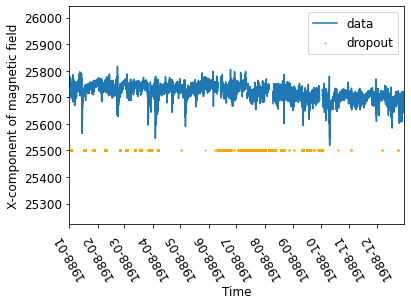

In [24]:
# Plot the 1988 data
plt.plot(df_1988['Time'], df_1988['X'], label='data')
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')

# This just puts a orange dot anywhere there is a data dropout. 
# The y-value 25500 is just so it displays at the bottom.
plt.scatter(df_1988['Time'][inds_1988], [25500]*inds_len_1988, color='orange', label='dropout', s=1)

# specific time 
plt.xlim([datetime.date(1988, 1, 1), datetime.date(1988, 12, 31)])
plt.xticks(rotation=120)
plt.legend()

In [25]:
# Dropouts major aug-oct. Was it a abnormal cold year during this period?

In [26]:
df_1991 = df[df['Time'] < pd.Timestamp(1991, 12, 31)]
inds_1991 = list(pd.isnull(df_1991['X']).to_numpy().nonzero()[0]) # indices of NaN values for the X component
inds_len_1991 = len(inds_1991) # number of NaNs in the X component
print(inds_len_1991)

839617


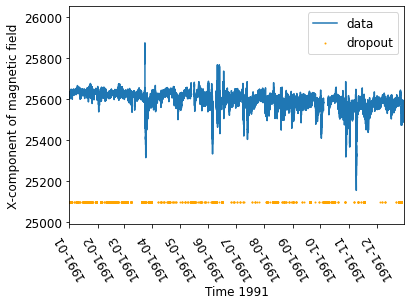

In [27]:
# Plot the 1991 data
plt.plot(df_1991['Time'], df_1991['X'], label='data')
plt.xlabel('Time 1991')
plt.ylabel('X-component of magnetic field')

# This just puts a orange dot anywhere there is a data dropout. 
# The y-value 25100 is just so it displays at the bottom.
plt.scatter(df_1991['Time'][inds_1991], [25100]*inds_len_1991, color='orange', label='dropout', s=1)

# specific time 
plt.xlim([datetime.date(1991, 1, 1), datetime.date(1991, 12, 31)])
plt.xticks(rotation=120)
plt.legend()

In [28]:
# Dropouts are consistant all year; Major jan-mar, apr-aug

In [29]:
df_1994 = df[df['Time'] < pd.Timestamp(1994, 12, 31)]
inds_1994 = list(pd.isnull(df_1994['X']).to_numpy().nonzero()[0]) # indices of NaN values for the X component
inds_len_1994 = len(inds_1994) # number of NaNs in the X component
print(inds_len_1994)

1009862


In [30]:
# Highest amount of NaNs so far

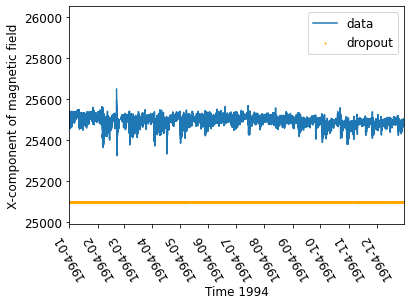

In [31]:
# Plot the 1994 data
plt.plot(df_1994['Time'], df_1994['X'], label='data')
plt.xlabel('Time 1994')
plt.ylabel('X-component of magnetic field')

# This just puts a orange dot anywhere there is a data dropout. 
# The y-value 25100 is just so it displays at the bottom.
plt.scatter(df_1994['Time'][inds_1994], [25100]*inds_len_1994, color='orange', label='dropout', s=1)

# specific time 
plt.xlim([datetime.date(1994, 1, 1), datetime.date(1994, 12, 31)])
plt.xticks(rotation=120)
plt.legend()

In [32]:
# No data all year?

In [33]:
df_1997 = df[df['Time'] < pd.Timestamp(1997, 12, 31)]
inds_1997 = list(pd.isnull(df_1997['X']).to_numpy().nonzero()[0]) # indices of NaN values for the X component
inds_len_1997 = len(inds_1997) # number of NaNs in the X component
print(inds_len_1997)

1057608


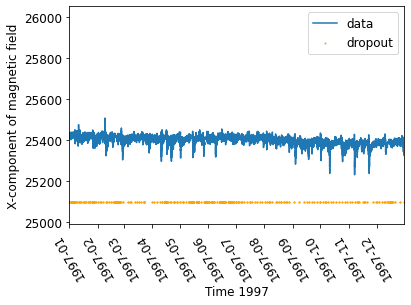

In [34]:
# Plot the 1997 data
plt.plot(df_1997['Time'], df_1997['X'], label='data')
plt.xlabel('Time 1997')
plt.ylabel('X-component of magnetic field')

# This just puts a orange dot anywhere there is a data dropout. 
# The y-value 25100 is just so it displays at the bottom.
plt.scatter(df_1997['Time'][inds_1997], [25100]*inds_len_1997, color='orange', label='dropout', s=1)

# specific time 
plt.xlim([datetime.date(1997, 1, 1), datetime.date(1997, 12, 31)])
plt.xticks(rotation=120)
plt.legend()

In [35]:
# Dropout all year; few consistanties

In [36]:
df_2000 = df[df['Time'] < pd.Timestamp(2000, 12, 31)]
inds_2000 = list(pd.isnull(df_2000['X']).to_numpy().nonzero()[0]) # indices of NaN values for the X component
inds_len_2000 = len(inds_2000) # number of NaNs in the X component
print(inds_len_2000)

1094302


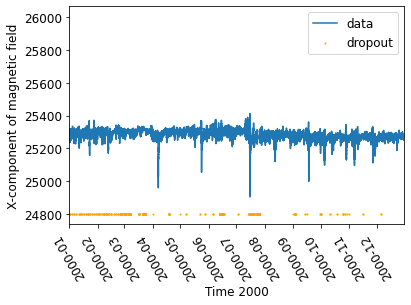

In [37]:
# Plot the 2000 data
plt.plot(df_2000['Time'], df_2000['X'], label='data')
plt.xlabel('Time 2000')
plt.ylabel('X-component of magnetic field')

# This just puts a orange dot anywhere there is a data dropout. 
# The y-value 24800 is just so it displays at the bottom.
plt.scatter(df_2000['Time'][inds_2000], [24800]*inds_len_2000, color='orange', label='dropout', s=1)

# specific time 
plt.xlim([datetime.date(2000, 1, 1), datetime.date(2000, 12, 31)])
plt.xticks(rotation=120)
plt.legend()

In [38]:
# Dropout in colder months; Jan-march


In [39]:
df_2004 = df[df['Time'] < pd.Timestamp(2004, 12, 31)]
inds_2004 = list(pd.isnull(df_2004['X']).to_numpy().nonzero()[0]) # indices of NaN values for the X component
inds_len_2004 = len(inds_2004) # number of NaNs in the X component
print(inds_len_2004)

1137689


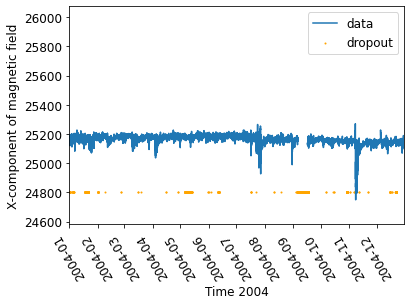

In [40]:
# Plot the 2004 data
plt.plot(df_2004['Time'], df_2004['X'], label='data')
plt.xlabel('Time 2004')
plt.ylabel('X-component of magnetic field')

# This just puts a orange dot anywhere there is a data dropout. 
# The y-value 24800 is just so it displays at the bottom.
plt.scatter(df_2004['Time'][inds_2004], [24800]*inds_len_2004, color='orange', label='dropout', s=1)

# specific time 
plt.xlim([datetime.date(2004, 1, 1), datetime.date(2004, 12, 31)])
plt.xticks(rotation=120)
plt.legend()

In [41]:
# Dropouts are grouped in small batches, but there are a ton of NaN's...
# Major magnetic flux in Novermber

In [42]:
df_2007 = df[df['Time'] < pd.Timestamp(2008, 12, 31)]
inds_2007 = list(pd.isnull(df_2007['X']).to_numpy().nonzero()[0]) # indices of NaN values for the X component
inds_len_2007 = len(inds_2007) # number of NaNs in the X component
print(inds_len_2007)

1204370


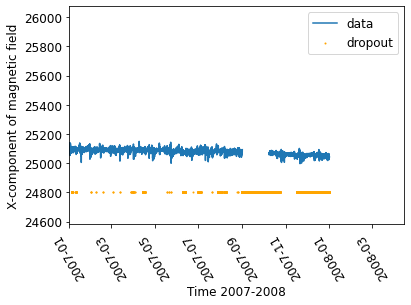

In [43]:
# Plot the 2007-2008 data
plt.plot(df_2007['Time'], df_2007['X'], label='data')
plt.xlabel('Time 2007-2008')
plt.ylabel('X-component of magnetic field')

# This just puts a orange dot anywhere there is a data dropout. 
# The y-value 24800 is just so it displays at the bottom.
plt.scatter(df_2007['Time'][inds_2007], [24800]*inds_len_2007, color='orange', label='dropout', s=1)

# specific time 
plt.xlim([datetime.date(2007, 1, 1), datetime.date(2008, 4, 15)])
plt.xticks(rotation=120)
plt.legend()

In [44]:
# major dropout between 09'07 and 11'07

In [45]:
# Is this a full dataframe of NaN free? used the mean value of each column and rounded? 

nan_free = (df.fillna({'Z': np.round(np.mean(df['Z']), 2), 'Y': np.round(np.mean(df['Y']), 2), 'X': np.round(np.mean(df['X']),2)}))
print(nan_free)

                        Time             X            Y        Z  \
0        1982-08-04 15:00:00  25899.085005  3992.420434  42229.0   
1        1982-08-04 15:01:00  25899.085005  3992.420434  42228.0   
2        1982-08-04 15:02:00  25899.201129  3991.667058  42228.0   
3        1982-08-04 15:03:00  25899.201129  3991.667058  42228.0   
4        1982-08-04 15:04:00  25899.201129  3991.667058  42228.0   
...                      ...           ...          ...      ...   
13363735 2007-12-31 23:55:00  25045.100000  3037.500000  40479.5   
13363736 2007-12-31 23:56:00  25460.500000  3515.750000  40479.5   
13363737 2007-12-31 23:57:00  25460.500000  3515.750000  40479.4   
13363738 2007-12-31 23:58:00  25460.500000  3515.750000  40479.2   
13363739 2007-12-31 23:59:00  25460.500000  3515.750000  40479.2   

               Time_Diff  
0                    NaT  
1        0 days 00:01:00  
2        0 days 00:01:00  
3        0 days 00:01:00  
4        0 days 00:01:00  
...                  

In [46]:
nan_free.head()

,Time,X,Y,Z,Time_Diff
0,1982-08-04 15:00:00,25899.085005,3992.420434,42229.0,NaT
1,1982-08-04 15:01:00,25899.085005,3992.420434,42228.0,0 days 00:01:00
2,1982-08-04 15:02:00,25899.201129,3991.667058,42228.0,0 days 00:01:00
3,1982-08-04 15:03:00,25899.201129,3991.667058,42228.0,0 days 00:01:00
4,1982-08-04 15:04:00,25899.201129,3991.667058,42228.0,0 days 00:01:00
